In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# load data from local
df = pd.read_csv(r'/Users/meow/Downloads/abalone.csv')
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# (rows, columns)
df.shape

(4177, 9)

In [4]:
# change all unnumerical data (in this case it's Type) to numerical
df2 = pd.get_dummies(df, columns = ['Type'])
df2.head()
df2.head()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Type_F,Type_I,Type_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [5]:
# ????
# create training and validation splits
from IPython.display import display
df2_train = df2.sample(frac=0.7, random_state=0) # how much to train on. what's random state???
df2_valid = df2.drop(df2_train.index)
display(df2_train.head(10))

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Type_F,Type_I,Type_M
668,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,13,0,0,1
1580,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,8,0,1,0
3784,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,11,0,0,1
463,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,5,0,1,0
2615,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,12,0,0,1
1399,0.650,0.505,0.165,1.1600,0.4785,0.2740,0.3490,11,1,0,0
2054,0.465,0.360,0.110,0.4955,0.2665,0.0850,0.1210,7,0,0,1
2058,0.485,0.390,0.135,0.6170,0.2500,0.1345,0.1635,8,0,0,1
217,0.405,0.300,0.120,0.3240,0.1265,0.0700,0.1100,7,0,1,0
1931,0.620,0.490,0.150,1.1950,0.4605,0.3020,0.3550,9,0,0,1


In [6]:
# split features and target
# "Rings" will be the target in this ML prediction, meaning the rest of the features are inputs
X_train = df2_train.drop('Rings', axis=1)
X_valid = df2_valid.drop('Rings', axis=1)
y_train = df2_train['Rings']
y_valid = df2_valid['Rings']

In [7]:
# import keras
from tensorflow import keras
from tensorflow.keras import layers, callbacks # import callbacks in case there is overfitting

In [8]:
#  early_stopping = callbacks.EarlyStopping(
#    min_delta=0.001, # minimium amount of change to count as an improvement
#    patience=20, # how many epochs to wait before stopping
#    restore_best_weights=True,
#)

In [9]:
# 
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[10]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [10]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [11]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 256,
    epochs = 100,
    verbose = 2,
)

Epoch 1/100
12/12 - 1s - loss: 9.6782 - val_loss: 9.1605
Epoch 2/100
12/12 - 1s - loss: 8.9135 - val_loss: 7.8749
Epoch 3/100
12/12 - 1s - loss: 8.0232 - val_loss: 7.3216
Epoch 4/100
12/12 - 1s - loss: 6.6727 - val_loss: 5.0106
Epoch 5/100
12/12 - 1s - loss: 5.3083 - val_loss: 2.6484
Epoch 6/100
12/12 - 1s - loss: 3.8563 - val_loss: 2.5811
Epoch 7/100
12/12 - 1s - loss: 2.9111 - val_loss: 2.7681
Epoch 8/100
12/12 - 1s - loss: 2.6252 - val_loss: 3.4061
Epoch 9/100
12/12 - 1s - loss: 2.5576 - val_loss: 3.6932
Epoch 10/100
12/12 - 1s - loss: 2.4411 - val_loss: 4.2891
Epoch 11/100
12/12 - 1s - loss: 2.4297 - val_loss: 4.3400
Epoch 12/100
12/12 - 1s - loss: 2.3675 - val_loss: 4.8678
Epoch 13/100
12/12 - 1s - loss: 2.3215 - val_loss: 4.3305
Epoch 14/100
12/12 - 1s - loss: 2.2945 - val_loss: 4.3945
Epoch 15/100
12/12 - 1s - loss: 2.2389 - val_loss: 4.0835
Epoch 16/100
12/12 - 1s - loss: 2.2222 - val_loss: 3.8474
Epoch 17/100
12/12 - 1s - loss: 2.2123 - val_loss: 3.7426
Epoch 18/100
12/12 - 1s

In [12]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout = True)
plt.rc('axes', labelweight = 'bold', labelsize = 'large',
       titleweight = 'bold', titlesize = 18, titlepad = 10)

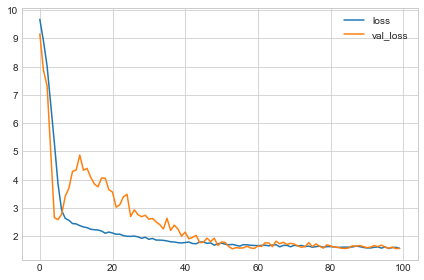

In [13]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();